In [149]:
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def stop_validation(fs,i,eps):
    if i == 0:
        return True
    elif abs(fs[i]-fs[i-1])>eps:
        return True
    else:
        return False

In [151]:
def generic_grad(f,gf,lsearch,x0,eps):
    fs = [f(x0)]
    xk = x0
    gk = gf(xk)
    count = 0
    while stop_validation(fs,count,eps):
        gk = gf(xk)
        tk = lsearch(f,xk,gk)
        xk = xk - tk*gk
        fs.append(f(xk) + 0.25)
        count+=1
    return xk, fs

def generic_grad_noised(f,gf,lsearch,x0,eps,mu,sigma):
    fs = [f(x0)]
    xk = x0
    gk = gf(xk)
    count = 0
    while stop_validation(fs,count,eps):
        gk = gf(xk)
        tk = lsearch(f,xk,gk)
        noise = np.random.normal(mu,sigma,xk.shape)
        xk = xk - tk*gk + noise
        fs.append(f(xk) + 0.25)
        count+=1
    return xk, fs

def const_step(s):
    return lambda f, xk,gk: s

In [152]:
def ex3(mu,sigma,x0,epsilon):
    f = lambda x: x[0]**2 + x[1]**4 - x[1]**2
    gf = lambda x: np.array([2*x[0], 4*(x[1]**3) - 2*x[1]])
    xk, fs = generic_grad(f,gf,const_step(0.1),x0,epsilon)
    xk_noised, fs_noised = generic_grad_noised(f,gf,const_step(0.1),x0,epsilon,mu,sigma)
    return xk, xk_noised, fs, fs_noised

In [153]:
[x,x_noise,fs,fs_noise] = ex3(mu=0,sigma=0.0005,x0=np.array([100,0]),epsilon=10**(-8))

In [159]:
fs

[10000,
 6400.25,
 4096.25,
 2621.6900000000005,
 1677.9716,
 1073.991824,
 687.44476736,
 440.0546511104001,
 281.7249767106561,
 180.39398509481993,
 115.54215046068474,
 74.03697629483824,
 47.47366482869648,
 30.473145490365745,
 19.592813113834072,
 12.629400392853807,
 8.172816251426436,
 5.320602400912918,
 3.495185536584268,
 2.3269187434139313,
 1.579227995784916,
 1.1007059173023463,
 0.7944517870735016,
 0.598449143727041,
 0.47300745198530625,
 0.392724769270596,
 0.34134385233318143,
 0.3084600654932361,
 0.2874144419156711,
 0.2739452428260295,
 0.2653249554086589,
 0.25980797146154166,
 0.2562771017353867,
 0.2540173451106475,
 0.2525711008708144,
 0.2516455045573212,
 0.2510531229166856,
 0.2506739986666788,
 0.2504313591466744,
 0.25027606985387163,
 0.25017668470647786,
 0.2501130782121458,
 0.2500723700557733,
 0.25004631683569495,
 0.25002964277484474,
 0.2500189713759006,
 0.2500121416805764,
 0.2500077706755689,
 0.2500049732323641,
 0.25000318286871304,
 0.250002

In [161]:
fs_noise

[10000,
 6400.183036598857,
 4096.16218860068,
 2621.7055139642634,
 1678.0062796456966,
 1074.0380644070153,
 687.4522177521413,
 440.0578918506825,
 281.7429310471276,
 180.39413775941583,
 115.53291121791298,
 74.01922651922361,
 47.459812703087216,
 30.46045862440307,
 19.58999196166472,
 12.629194119819294,
 8.173901285578868,
 5.322189568766334,
 3.495668292113433,
 2.3276699886366607,
 1.5800105594879972,
 1.1019815223188312,
 0.7944995669071396,
 0.5982462342006205,
 0.4717154562179214,
 0.3911646306211627,
 0.3390371846859373,
 0.30497894071796083,
 0.28153228593132473,
 0.265194423963194,
 0.2526964609633561,
 0.2417295606376465,
 0.23071948391195682,
 0.21851209577694533,
 0.20378140831073838,
 0.18542235532045925,
 0.16290741258793157,
 0.13619207386199683,
 0.1071913795142562,
 0.07789914111962726,
 0.05163755101110917,
 0.030903676776450506,
 0.01657165582028003,
 0.008098461615140773,
 0.00348451822936946,
 0.0013727104270967738,
 0.0005950406949358777,
 0.00019194448714

In [157]:
print('x = ',x)
print('x noised = ',x_noise)
print('Theoretical minimum point',[0.0, 1/np.sqrt(2)])

x =  [0.0001226 0.       ]
x noised =  [4.92582570e-05 7.07013245e-01]
Theoretical minimum point [0.0, 0.7071067811865475]


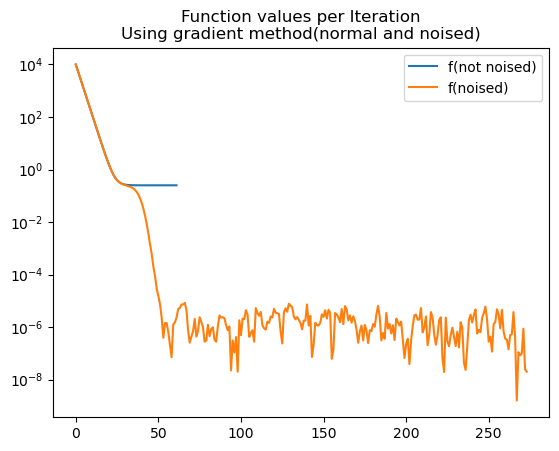

In [155]:
plt.semilogy(np.arange(len(fs)),fs, label = 'f(not noised)')
plt.semilogy(np.arange(len(fs_noise)),fs_noise, label = 'f(noised)')
plt.title('Function values per Iteration\n'
          'Using gradient method(normal and noised)')
plt.legend()
plt.show()